## Homework #2

1) For snake eyes its 1/32

- 3 + 4
- 6 + 1
- 5 + 2

For sum of 7 it is a 1/6 probability

In [29]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import sympy as sp

In [36]:
die=np.array([1/6,1/6,1/6,1/6,1/6,1/6])
c=np.convolve(die,die)
c

array([0.02777778, 0.05555556, 0.08333333, 0.11111111, 0.13888889,
       0.16666667, 0.13888889, 0.11111111, 0.08333333, 0.05555556,
       0.02777778])

In [49]:
x=np.arange(2,13)
for i in range(len(c)):
    print(f"The Probability of Summing to {x[i]} is {sp.nsimplify(c[i])}")

The Probability of Summing to 2 is 1/36
The Probability of Summing to 3 is 1/18
The Probability of Summing to 4 is 1/12
The Probability of Summing to 5 is 1/9
The Probability of Summing to 6 is 5/36
The Probability of Summing to 7 is 1/6
The Probability of Summing to 8 is 5/36
The Probability of Summing to 9 is 1/9
The Probability of Summing to 10 is 1/12
The Probability of Summing to 11 is 1/18
The Probability of Summing to 12 is 1/36


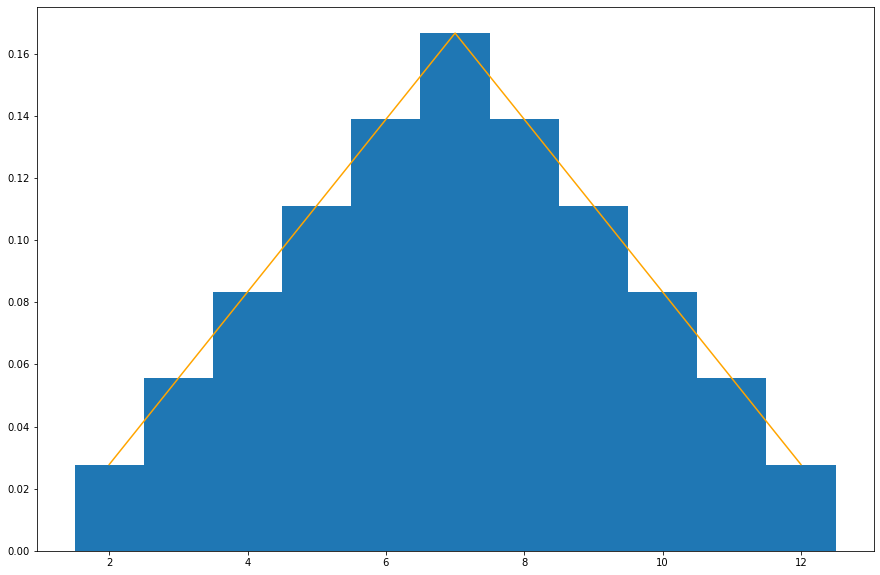

In [28]:
fig, ax = plt.subplots(figsize=(15,10))
x=np.arange(2,13)
ax.bar(x,c,width=1)
ax.plot(x,c,c='orange');

In [37]:
np.mean(c)

0.09090909090909091

In [38]:
np.std(c)**2

0.0019768390980512197

In [40]:
x

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])